# KNN Exercise (Practice)
- **Student:** Michael McCann
- **Date:** 09 MAR 2022

## Setup -Mount Drive, Import Libraries and Data

In [85]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import set_config
set_config(display='diagram')

In [87]:
## Load and Inspect the Data
abalone_filepath = '/content/drive/MyDrive/Data/abalone.data'
col_names = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
abalone_df = pd.read_csv(abalone_filepath, names = col_names)

abalone_df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [88]:
## No Duplicates or NAs
print(f"Number of NAs: {abalone_df.isna().sum().sum()}")
print(f"Number of Duplicates: {abalone_df.duplicated().sum()}")

Number of NAs: 0
Number of Duplicates: 0


In [89]:
# Check the balance of the target column
abalone_df['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

Data is fairly well balanced with 1528 Male, 1342 Immature, and 1307 Female.

In [90]:
y = abalone_df['sex']
X = abalone_df.drop(columns = 'sex')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [91]:
# Create pipe with scaler and knn model
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1))

# fit pipe
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [92]:
#baseline accuracy
knn_pipe.score(X_test, y_test)

0.5014354066985646

In [93]:
# Find the best K Value
neighbors = list(range(80,111,1))

accuracy = []
for n in neighbors:
    knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = n))
    knn_pipe.fit(X_train, y_train)
    score = knn_pipe.score(X_test, y_test)
    accuracy.append(score)

# Find the Highest Value
k_val = pd.Series(accuracy, neighbors).sort_values(ascending = False)
k_val.head(1)

102    0.585646
dtype: float64

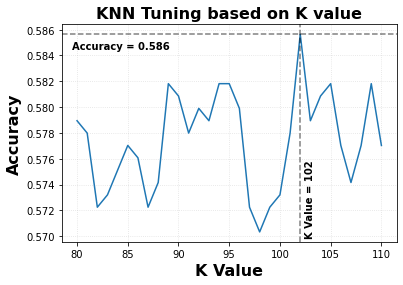

In [94]:
plt.plot(neighbors, accuracy)
plt.axhline(.585646, color = 'k', ls = '--', alpha = .5)
plt.axvline(102, color = 'k', ls = '--', alpha = .5)
plt.grid(alpha = .4, ls = ':')
plt.annotate('K Value = 102', (102.5, .570), rotation = 90, weight = 'semibold')
plt.annotate('Accuracy = 0.586', (79.5, .5845), weight = 'semibold')
plt.title('KNN Tuning based on K value', fontsize = 16, weight = 'bold')
plt.xlabel('K Value', fontsize = 16, weight = 'bold')
plt.ylabel('Accuracy', fontsize = 16, weight = 'bold');

In [95]:
# If you keep all 3
#Create pipe with scaler and knn model
knn102 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 102))

# fit pipe
knn102.fit(X_train, y_train)

# pred
pred = knn102.predict(X_test)

In [96]:
cm = confusion_matrix(y_test.values, pred)
cm

array([[115,  56, 145],
       [ 28, 300,  22],
       [ 97,  85, 197]])

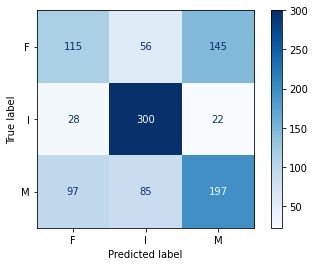

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap ='Blues');

In [98]:
abalone_df = pd.read_csv(abalone_filepath, names = col_names)
abalone_df['sex'] = abalone_df['sex'].map({'M':0, 'F':0, 'I':1})


In [99]:
y = abalone_df['sex']
X = abalone_df.drop(columns = 'sex')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [100]:
neighbors = list(range(25,75,1))

accuracy = []
for n in neighbors:
    knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = n))
    knn_pipe.fit(X_train, y_train)
    score = knn_pipe.score(X_test, y_test)
    accuracy.append(score)

#Find the Highest Value
k_val = pd.Series(accuracy, neighbors).sort_values(ascending = False)
k_val.head(1)

47    0.850718
dtype: float64

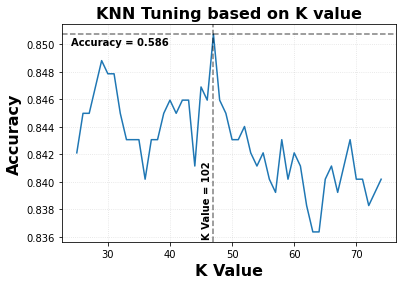

In [101]:
# Graph it
plt.plot(neighbors, accuracy)
plt.axhline(.850718, color = 'k', ls = '--', alpha = .5)
plt.axvline(47, color = 'k', ls = '--', alpha = .5)
plt.grid(alpha = .4, ls = ':')
plt.annotate('K Value = 102', (45.2, .836), rotation = 90, weight = 'semibold')
plt.annotate('Accuracy = 0.586', (24, .8499), weight = 'semibold')
plt.title('KNN Tuning based on K value', fontsize = 16, weight = 'bold')
plt.xlabel('K Value', fontsize = 16, weight = 'bold')
plt.ylabel('Accuracy', fontsize = 16, weight = 'bold');


In [102]:
# Create pipe with scaler and knn model
knn47 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 47))

# fit pipe
knn47.fit(X_train, y_train)

# pred
pred = knn47.predict(X_test)

In [103]:
cm = confusion_matrix(y_test.values, pred)
cm

array([[630,  65],
       [ 91, 259]])

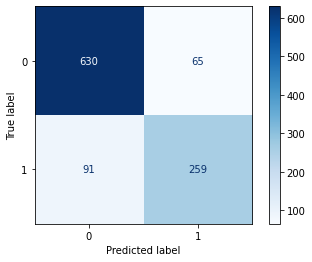

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap ='Blues');